# Price Elasticity

In [10]:
from __future__ import print_function
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
beef = pd.read_csv('beef.csv')
beef.head(3)

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000


**1. using groupby method**

In [15]:
df_grouped=beef.groupby(['Year','Quantity','Price']).agg(quantity_mean=('Quantity','mean'),price_mean=('Price','mean')).reset_index()

df_grouped.head(4)

,Year,Quantity,Price,quantity_mean,price_mean
0,1977,22.6131,143.9333,22.6131,143.9333
1,1977,22.7401,150.8000,22.7401,150.8000
2,1977,22.9976,142.1667,22.9976,142.1667
3,1977,23.4054,146.5000,23.4054,146.5000


In [16]:
def PED_calculation(year,quantity,price,quantity_mean,price_mean):
    delta_q = (quantity - quantity_mean) / quantity_mean
    delta_p = (price - price_mean) / price_mean
    PED = np.mean(delta_q / delta_p) * (-price_mean / quantity_mean)
    return year

df_grouped['PED'] = df_grouped.apply(lambda row: PED_calculation(row['Year'], row['Quantity'],row['Price'], row['quantity_mean'],row['price_mean']), axis=1)
df_grouped.head(4)

C:\Users\Convergytics\AppData\Local\Temp\ipykernel_10312\2728937344.py:4: RuntimeWarning: invalid value encountered in double_scalars
  PED = np.mean(delta_q / delta_p) * (-price_mean / quantity_mean)


,Year,Quantity,Price,quantity_mean,price_mean,PED
0,1977,22.6131,143.9333,22.6131,143.9333,1977.0
1,1977,22.7401,150.8000,22.7401,150.8000,1977.0
2,1977,22.9976,142.1667,22.9976,142.1667,1977.0
3,1977,23.4054,146.5000,23.4054,146.5000,1977.0


**2.Using model

In [7]:
#OLS
beef_model = ols("Quantity ~ Price", data=beef).fit()
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.69e-46
Time:                        13:24:42   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

small P values-->reject the null hypothesis that Price has no effect on Quantity.

Hight R-squared-->our model explains a lot of the response variability.


In [8]:
df.describe()

,Store,Price,Sales
count,22.000000,22.000000,22.000000
mean,11.500000,21.863636,504.863636
std,6.493587,1.254912,56.594881
min,1.000000,19.600000,388.000000
25%,6.250000,20.950000,473.000000
50%,11.500000,22.000000,501.500000
75%,16.750000,22.600000,525.750000
max,22.000000,24.400000,622.000000


In [ ]:
y=mx+c

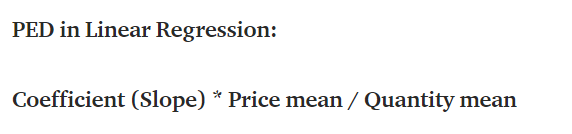

In [10]:
if beef_model.f_pvalue < 0.05:  #reject the null hypothesis
    intercept, slope = beef_model.params
    print('intercept',intercept)
    print('slope',slope)

intercept 30.051485828783257
slope -0.046510794565567296
